In [113]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import math

          0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000


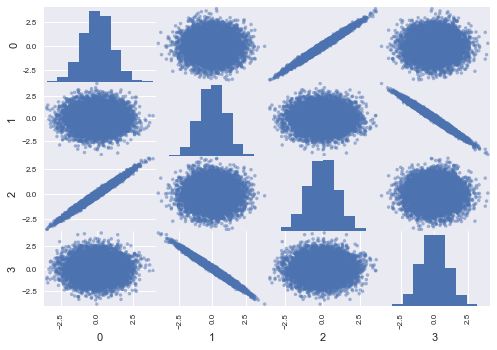

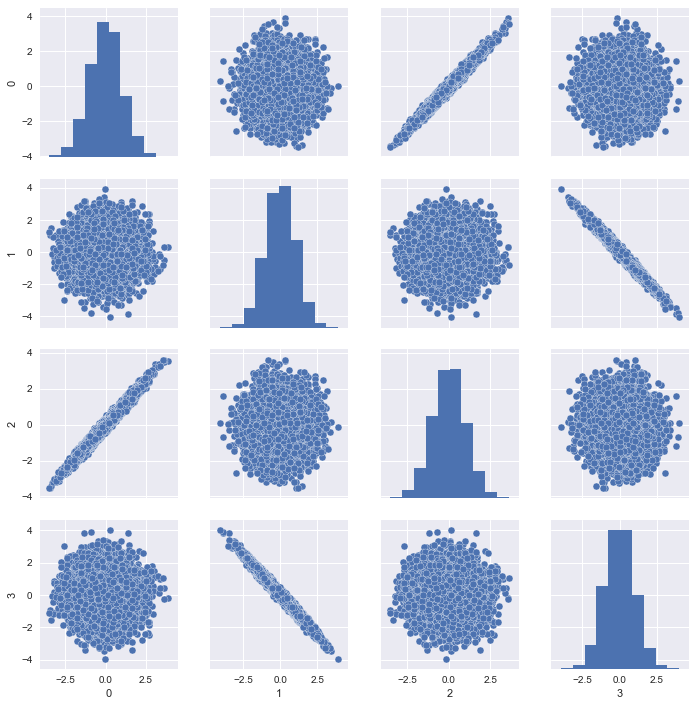

In [114]:
# Question 1 - Part 1
a = pd.read_csv("D:\Kevin Liang\Downloads\Lab2_Data\DF1", header = 0, index_col = 0)

#pandas
print a.corr()

b = pd.plotting.scatter_matrix(a)

#seaborn
sns.pairplot(a,kind='scatter')
sns.plt.show()

# Column's 0 and 2 are pairwise correlated with a correlation value of 0.990066.
# Column's 1 and 3 are pairwise correlated with a negative correlation value of -.990235.

In [115]:
# Question 1 - Part 2

a.cov()

# Covariance Equation : (1/n)*SUM((x-mean(x))(y-mean(y))) 
# The positive elements of the covariance matrix are also positive
# in the correlation matrix and in the plots, while the negative elements
# are also negative in the correlation matrix and in the correlation plots.

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


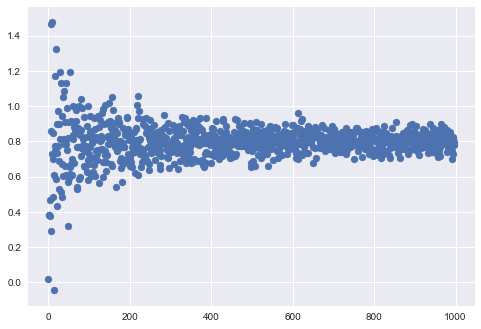

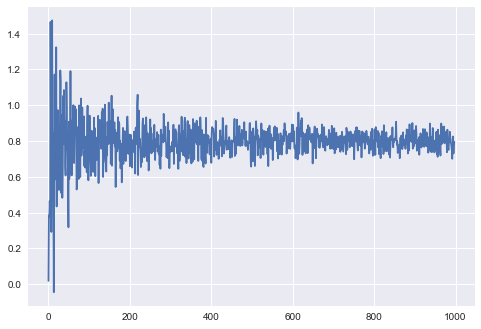

In [116]:
# Question 1 - Part 3

cov = []
for x in range(2,1000):
    c = np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,.8],[0,.8,1]], x)
    d = np.cov(c.transpose())
    cov.append(d[1,2])

plt.scatter(range(len(cov)), cov)
plt.show()
plt.plot(range(len(cov)), cov)
plt.show()

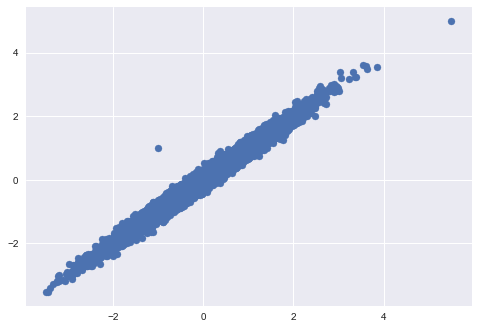

[[ 10.4672271   -9.53225769]
 [  8.54640488  -8.31353788]
 [-10.55682902  10.72311449]
 ..., 
 [ -8.47775263   9.46233257]
 [ -2.78440519   3.29159129]
 [ -0.55553807   1.77574979]]


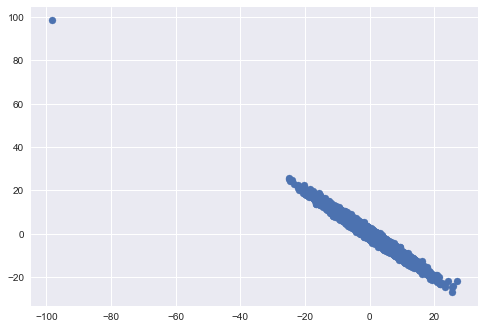

In [117]:
#Problem 2

data = pd.read_csv("D:\Kevin Liang\Downloads\Lab2_Data\DF2")

# displaying current data showing two outliers
plt.scatter(data['0'], data['1'])
plt.show()

# determing covariance matrix of data set
a = np.cov(data['0'], data['1'])

# taking inverse of data
a = np.linalg.inv(a)
xyData = data.loc[:,'0':'1']

# multiplying inverse covariance matrix times every data point to get a gaussian distribution of data,
# and to get the covariance matrix of the data to be the identity matrix 
k = np.dot(xyData, a)
print k

#displaying data with one huge outlier point (1,1) transformed
plt.scatter(k[:,0], k[:,1])
plt.show()



0.263219887789
[0.089442719099991588, 0.063245553203367583, 0.044721359549995794, 0.031622776601683791, 0.025819888974716113, 0.022360679774997897, 0.015811388300841896, 0.010846522890932807]


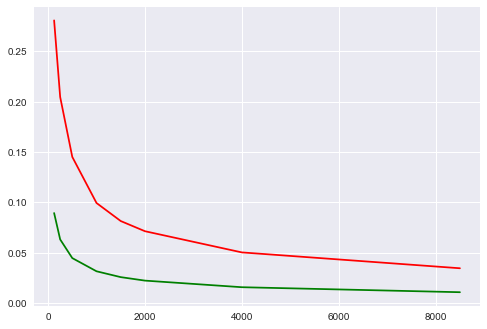

In [118]:
# Problem 3

# Part 1

# Declare constants
def part_two(n):
    beta_naught = -3
    beta = 0
    samples = 2000

    distances = []
    for x in range(samples):
        x = np.random.normal(0, 1, n)
        e = np.random.normal(0, 1, n)

        # Generate y_i = beta_naught + e_i
        y = beta_naught + x * beta + e

        # Calculate beta_hat for the dataset
        beta_hat = np.dot(x, y) / np.dot(x, x)
        #beta_hat = (x.transpose() * y) * (x.transpose() * x)
        sd = beta_hat - beta
        distances.append(sd)

    sum = 0
    for num in distances:
        sum += math.pow(num, 2)
    std_dev = math.sqrt(sum / samples)
    return std_dev

print part_two(150)


# For n = 150, the empirical standard deviation is 0.263219887789. 
# This means that the Beta Hat which we find (-0.15) is not at all significant as this is less than the deviation.

# Part 2
n = [125, 250, 500, 1000, 1500, 2000, 4000, 8500]
plot_n = []
for number in n: 
    plot_n.append(part_two(number))
plot_sqrt = []
for number in n: 
    temp = np.sqrt(number)
    temp = 1/temp
    plot_sqrt.append(temp)
print(plot_sqrt)
plt.plot(n, plot_n, 'r')
#plt.plot(plot_n)
plt.plot(n, plot_sqrt, 'g')
plt.show()

# the fit for both of the graphs are similar in form. They both decrease at an exponential rate.

In [119]:
# Problem 4

# Part 1
def most_popular(k, XXXX):
    df = pd.read_csv('D:\Kevin Liang\Downloads\Names\Names\yob' + str(XXXX) + ".txt", header=None, names=["Name", "Gender", "Frq"], delimiter=',', usecols=[0,2])
    df = df.groupby(by=["Name"]).sum()
    #names.sort_values(3, ascending=False)
    print df.nlargest(int(k), "Frq")
    #print names
    
# Part 2
def name_frequency(Name):
    men_frq = 0
    women_frq = 0
    num_adds = 0
    for year in range(1880, 2016):
        df = pd.read_csv('D:\Kevin Liang\Downloads\Names\Names\yob' + str(year) + ".txt", header=None, names=["Name", "Gender", "Frq"], delimiter=',')
        select_indices = list(np.where(df["Name"] == str(Name))[0])
        if Name in df["Name"].values:
            for _ in select_indices:
                if df["Gender"].iloc[_] == 'M':
                    men_frq += df["Frq"].iloc[_]
                    num_adds += 1
                else:
                    women_frq += df["Frq"].iloc[_]
                    num_adds += 1
        else:
            print Name + " wasn't found in year " + str(year)
    print str(men_frq) + " instances of men named " + str(Name) 
    print str(women_frq) + " instances of women named " + str(Name)
    
# Part 3
def relative_frequency(Name, year):
    men_frq = 0.0
    women_frq = 0.0
    num_adds = 0
    #for year in range(1880, 2016):
    df = pd.read_csv('D:\Kevin Liang\Downloads\Names\Names\yob' + str(year) + ".txt", header=None, names=["Name", "Gender", "Frq"], delimiter=',')
    select_indices = list(np.where(df["Name"] == Name)[0])
    total_freq = 0.0
    for val in df["Frq"]:
        total_freq += int(val)
    if Name in df["Name"].values:
        for _ in select_indices: 
            if df["Gender"].iloc[_] == 'M':
                men_frq += df["Frq"].iloc[_]/total_freq
            else:
                women_frq += df["Frq"].iloc[_]/total_freq
    else:
        print Name + " wasn't found in year " + str(year)
    print "Normalized frequency of " + Name + " in men:" + str(men_frq)
    print "Normalized frequency of " + Name + " in women:" + str(women_frq)

# Part 4
def gendered_popularity():
    D = { }
    a = [ ]
    men_frq = { } #largest value only
    women_frq = { } #largest value only
    num_adds = 0
    winner = ' '
    for year in range(1880, 2016):
        df = pd.read_csv('D:\Kevin Liang\Downloads\Names\Names\yob' + str(year) + ".txt", header=None, names=["Name", "Gender", "Frq"], delimiter=',')
        size = len(df)
        name = ""
        for index in range (0, size):
            name = str(df["Name"][index])
            if not(men_frq.has_key(name)):
                men_frq[name] = 0
            if not(women_frq.has_key(name)):
                women_frq[name] = 0;
            if df["Gender"][index] == 'M' and men_frq[name] < df["Frq"][index]:
                men_frq[name] = df["Frq"][index]
                if D.has_key(name) and D[name] != 'M':
                    if women_frq.has_key(name) and women_frq[name] < men_frq[name] and women_frq > 0:
                        D[name] = 'M'
                        a.append(name)
                    else:
                        D[name] = 'M'
                else:
                    D[name] = ' '
            else:
                women_frq[name] = df["Frq"][index]
                if D.has_key(name) and D[name] != 'F':
                    if women_frq.has_key(name) and women_frq[name] > men_frq[name] and men_frq > 0:
                        D[name] = 'F'
                        a.append(name)
                    else:
                        D[name] = 'F'
                else:
                    D[name] = ' '
    my_set = set(a)
    print len(my_set)

# TEST
most_popular(10,1880)
name_frequency("Matt")
relative_frequency("John",  1880)
gendered_popularity()





          Frq
Name         
John     9701
William  9561
Mary     7092
James    5949
Charles  5359
George   5152
Frank    3255
Joseph   2642
Anna     2616
Thomas   2542
23460 instances of men named Matt
5 instances of women named Matt
Normalized frequency of John in men:0.0479199134414
Normalized frequency of John in women:0.000228308235971
69479


In [120]:
# Problem 5

# Method 1 - Displayed
# My method consists of checking all user_location cells and determine whether or not
# the name of the state exists somewhere in the user_locations cell.
# This is done by cheking if the substring (the state name) exists in the user_location cell.
# It will then mark a tweet with its associated state. 
# The total number of tweets from a state is then calculated and displayed in a list.

# Method 2 - Not Displayed
# Regular expressions could be used to account for state acronyms as well.

tweets = pd.read_csv("D:/Kevin Liang/Downloads/tweets.csv")



# dictionary of all states in the US
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

# area equation to determine check which state of a tweet
def area(location):
    for x in states.keys():
        if states[x].lower() in str(location).lower():
            return states[x]

# create new column categorizing each tweet with a associated state
tweets["place"] = tweets["user_location"].apply(area)

# counting the total number of tweets from a state
tl = {}
tl = tweets["place"].value_counts()

# display count of tweets from a state
print tl



Texas                   4795
New York                4520
Florida                 4042
California              4007
Washington              3335
Ohio                    1326
New Jersey              1207
North Carolina          1138
Michigan                1138
Colorado                1070
Georgia                 1031
Virginia                1008
Tennessee                990
Arizona                  986
Indiana                  910
Pennsylvania             890
Oregon                   822
Kansas                   734
Illinois                 713
Maryland                 579
Alabama                  572
South Carolina           559
Massachusetts            521
Wisconsin                514
Minnesota                509
Oklahoma                 504
Louisiana                486
Missouri                 462
Iowa                     447
Kentucky                 397
Connecticut              367
Nevada                   312
Maine                    258
West Virginia            249
Hawaii        